Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:
* a. Import the necessary packages
* b. Load the training and testing data
* c. Define the network architecture using Keras
* d. Train the model using SGD with 11 epochs
* e. Evaluate the network  
* f. Plot the training loss and accuracy

# a.Import the necessary packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD

D:\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



## b.Load the training and testing data

In [5]:
train=pd.read_csv("mnist_train.csv")
test=pd.read_csv("mnist_test.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train = train.drop(['label'],axis=1).values

In [8]:
y_train=train['label'].values

In [9]:
x_test=test.drop(['label'],axis=1).values

In [10]:
y_test=test['label'].values

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [13]:
# x_train = x_train/255 
x_train = x_train.astype("float32")/255.0 
# x_test=x_test/255 
x_test=x_test.astype("float32")/255.0

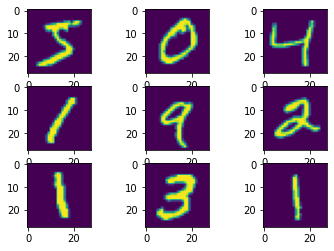

In [14]:
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    

## Define the network architecture using Keras


In [15]:
#defining the model architecture
model= Sequential()
model.add(Flatten(input_shape = (28,28,1)))
#model.add(Dense(128,input_shape = (784, ),activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="softmax"))



# for learniung rate specification
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate = 0.1)

# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

## d. Train the model using SGD with 11 epochs

In [23]:
name_model=model.fit(x_train,y_train,batch_size=64,epochs=11,validation_split=0.2)

Epoch 1/11
750/750 [==============================] - 5s 7ms/step - loss: 0.1827 - accuracy: 0.9467 - val_loss: 0.1151 - val_accuracy: 0.9655
Epoch 2/11
750/750 [==============================] - 5s 6ms/step - loss: 0.1734 - accuracy: 0.9493 - val_loss: 0.1118 - val_accuracy: 0.9671
Epoch 3/11
750/750 [==============================] - 5s 7ms/step - loss: 0.1684 - accuracy: 0.9510 - val_loss: 0.1086 - val_accuracy: 0.9686
Epoch 4/11
750/750 [==============================] - 5s 6ms/step - loss: 0.1607 - accuracy: 0.9530 - val_loss: 0.1056 - val_accuracy: 0.9695
Epoch 5/11
750/750 [==============================] - 5s 7ms/step - loss: 0.1572 - accuracy: 0.9538 - val_loss: 0.1053 - val_accuracy: 0.9692
Epoch 6/11
750/750 [==============================] - 5s 7ms/step - loss: 0.1508 - accuracy: 0.9564 - val_loss: 0.1047 - val_accuracy: 0.9699
Epoch 7/11
750/750 [==============================] - 5s 6ms/step - loss: 0.1470 - accuracy: 0.9566 - val_loss: 0.1011 - val_accuracy: 0.9702
Epoch 

## prediction


In [17]:
pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


4


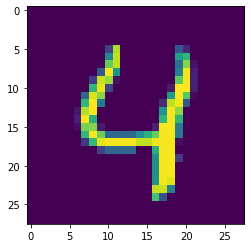

In [18]:
plt.imshow(x_test[4])
print(pred.argmax(axis=1)[4])

## Evaluate the network

In [19]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9612


## Plot the training loss and accuracy

In [20]:
name_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

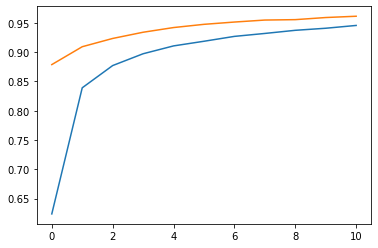

In [21]:
plt.plot(name_model.history['accuracy'])
plt.plot(name_model.history['val_accuracy'])

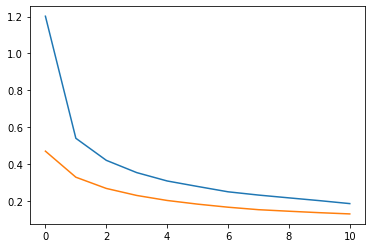

In [22]:
plt.plot(name_model.history['loss'])
plt.plot(name_model.history['val_loss'])